## Model simulation: Biochemical reactor with Monod kinetics

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

In [4]:
# Import all functionalities
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Layout
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We import all relevant functions that we will use 

In [5]:
sys.path.append("functions")
%aimport general_functions
%aimport monod
function_derivatives = monod.model_derivatives

## Model simulation

We simulate the Monod model

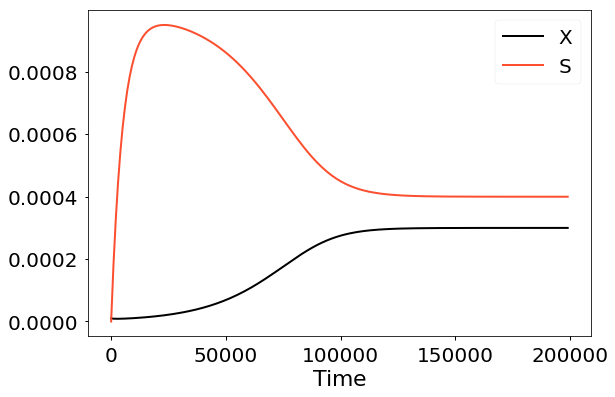

In [6]:
X_init = 1e-5
S_init = 0
total_time = 200000
df = general_functions.model(
    np.arange(0, total_time, 1000), # Timesteps
    [X_init, S_init], # Initial conditions
    ['X','S'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of initial conditions

In [7]:
def interactive_model(logX, logS):
    general_functions.model(
        np.arange(0, total_time, 10), # Timesteps
        [10**logX, 10**logS], # Initial conditions
        [r'$X$',r'$S$'], # Variable names
        function_derivatives, # Function derivatives
        returnDataFrame=True, plotresults=True,
        # Specify parameter values
        mu_max=3e-4, Q=1, V=5000, Y=0.5, K_S=2e-4, S_in=0.001)
interact(interactive_model,
        logX=IntSlider(value=-5, min=-6, max=0, step=1, description=r'log(X)', continuous_update=False),
        logS=IntSlider(value=-6, min=-6, max=0, step=1, description=r'log(S)', continuous_update=False));

interactive(children=(IntSlider(value=-5, continuous_update=False, description='log(X)', max=0, min=-6), IntSl…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of kinetic parameter values

In [8]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, total_time, 10)), # timesteps
         init=fixed([1e-5, 0]), # Initial conditions
         varnames=fixed([r'$X$',r'$S$']), # Variable names
         f=fixed(function_derivatives), # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify the parameter values
         mu_max=FloatSlider(value=3e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$\mu_max$', continuous_update=False,readout_format='.4f'),
         Q=fixed(1), V=fixed(5000),
         Y=FloatSlider(value=0.5, min=0.1, max=1, step=0.1, description=r'$Y$', continuous_update=False),
         K_S=FloatSlider(value=2e-4, min=1e-4, max=1e-3, step=1e-4, description=r'$K_s$', continuous_update=False,readout_format='.4f'), 
         S_in=fixed(1e-3));

interactive(children=(Checkbox(value=False, description='twinax'), FloatSlider(value=0.0003, continuous_update…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Impact of flow parameters and inlet $S$

In [9]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, total_time, 10)), # timesteps
         init=fixed([1e-5, 0]), # Initial conditions
         varnames=fixed([r'$X$',r'$S$']), # Variable names
         f=fixed(function_derivatives), # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),
         # Specify parameter values
         mu_max=fixed(3e-4),
         Q=FloatSlider(value=1, min=.1, max=5, step=0.1, description=r'$Q$', continuous_update=False,readout_format='.1f'),
         V=FloatSlider(value=5000, min=1000, max=10000, step=1000, description=r'$V$', continuous_update=False,readout_format='4.0d'),
         Y=fixed(0.5), K_S=fixed(2e-4), 
         S_in=FloatSlider(value=1e-3, min=0, max=0.01, step=1e-3, description=r'$S_{in}$', continuous_update=False,readout_format='.3f'));

interactive(children=(Checkbox(value=False, description='twinax'), FloatSlider(value=1.0, continuous_update=Fa…

$$\frac{dX}{dt}= \mu_{max}\frac{S}{K_{S}+S}X - \frac{Q}{V}X$$

$$\frac{dS}{dt}= -\frac{1}{Y} \mu_{max}\frac{S}{K_{S}+S}X + \frac{Q}{V}(S_{in} - S)$$

## Sensitivity analysis of the biochemical reactor with Monod kinetics

In [10]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, total_time, 10)), # Timesteps
    init=fixed([1e-5, 0]), # Initial conditions
    varnames=fixed([r'$X$',r'$S$']), # Variable names
    f=fixed(function_derivatives), # Function derivatives
    parametername=ToggleButtons(options=['mu_max', 'Q', 'V', 'Y', 'K_S', 'S_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    mu_max=fixed(3e-4), Q=fixed(1), V=fixed(5000), Y=fixed(0.5),
    K_S=fixed(2e-4), S_in=fixed(1e-3));

interactive(children=(ToggleButtons(description='parametername', options=('mu_max', 'Q', 'V', 'Y', 'K_S', 'S_i…

## Calibration

1. We first generate some noisy data based on our previous model results with some model parameters
2. We calibrate the model to find the optimal set of parameters that best fit this new noisy data
3. The algorithm is run until the original set of parameters for our model is obtained (which satisfies certain criteria, e.g. solver tolerance)

We generate some artificial experimental data and we plot it with the simulation data that we have just used

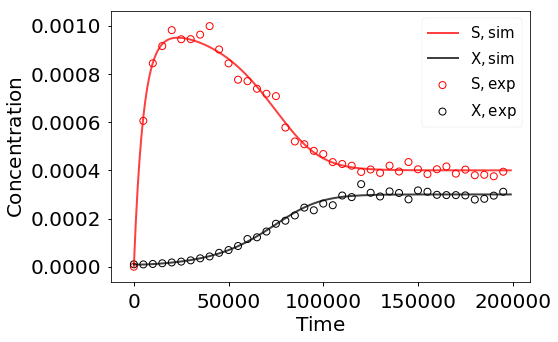

In [11]:
import matplotlib.pyplot as plt

size_data = int(total_time/1000)
time=np.arange(0, total_time, 1000)
noise_data_ratio=0.05
# Based on Gaussian noise
# Our current solution
steps = 5
# We only select a certain amount of points
X = df['X'][::steps]
S = df['S'][::steps]
time_new = time[::steps]
X_noisy_val = np.random.normal(0,noise_data_ratio*X[X.index[1:]])
S_noisy_val = np.random.normal(0,noise_data_ratio*S[S.index[1:]])
X_noisy = X[X.index[1:]] + X_noisy_val
S_noisy = S[S.index[1:]] + S_noisy_val
df_noisy=pd.DataFrame(data=[np.append(X_init,X_noisy),np.append(S_init,S_noisy)]).T
df_noisy.columns=['X','S']
df_noisy.index=time_new


fig = plt.figure(figsize=(7.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax = fig.add_subplot(111) 
ax.plot(time,df['S'],'r-',alpha=0.75,label=r'$\mathrm{S,sim}$')
ax.scatter(time_new,df_noisy['S'],facecolors='none', edgecolors='r',linewidths=1,label=r'$\mathrm{S,exp}$')
ax.plot(time,df['X'],'k',alpha=0.75,label=r'$\mathrm{X,sim}$')
ax.scatter(time_new,df_noisy['X'],facecolors='none', edgecolors='k',linewidths=1,label=r'$\mathrm{X,exp}$')

ax.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)
ax.set_ylabel(r'$\mathrm{Concentration}$', fontsize=20,rotation=90)
ax.legend(fontsize=15)

plt.show()

We load some previously saved noise yo always obtain the same result

In [12]:
# In case you want to save the data
#df_noisy.to_csv(os.path.join(os.curdir,'data\df_noisy_normal_monod.csv'), index=True)
# To load the data that has already been saved
df_noisy = pd.read_csv(os.path.join(os.curdir,'data','df_noisy_normal_monod.csv'), index_col=0)

We define the model to accept different values of parameters and establish the objective function with the data that we have just generated

In [13]:
def sim_model(args):
    mu_max, K_S = args
    sim = general_functions.model(
    np.arange(0, total_time, 1000)[::steps], # Timesteps
    [1e-5, 0], # Initial conditions
    ['X','S'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=False,
    # Specify parameter values
    mu_max=mu_max, Q=1, V=5000, Y=0.5, K_S=K_S, S_in=0.001)
    return sim

def optimizer(args, obj_func=general_functions.sse, data=df_noisy):
    sim = sim_model(args)
    return obj_func(sim[["X", "S"]], data[["X", "S"]])

We run the calibration as a function of the number of algorithm evaluations

In [15]:
# Initial values of parameters
x0 = [1e-3, 1e-3]

# Calibration of model
parameters,results = general_functions.track_calib(optimizer,
    x0, param_names=[r'$\mu_{max}$', r'$K_S$'], method='Nelder-Mead',# Only works for now with Nelder-Mead and BFGS
    bounds = ((0, 0.01), (0, 0.01)),maxiter=500,tol=1e-7)

# Interactive plot with all calibration iterations
interact(general_functions.plot_calib,
         parameters=fixed(parameters), results=fixed(results),
         i=IntSlider(value=0, min=0, max=parameters.shape[0]-1, step=1, continuous_update=False),
         data=fixed(df_noisy), sim_model=fixed(sim_model))

# Report final solver information
optimal_params = [parameters.iloc[-1].values[0],parameters.iloc[-1].values[1]]
print("N. evaluations: {}, Final parameters: mu_max:{:.4f}, K_s:{:.4f}".format(np.size(parameters['$K_S$']),optimal_params[0],optimal_params[1]))

interactive(children=(IntSlider(value=0, continuous_update=False, description='i', max=92), Output()), _dom_cl…

N. evaluations: 93, Final parameters: mu_max:0.0003, K_s:0.0002


We run the model multiple times to generate contour values of the objective function by brute force (which can be time consuming)

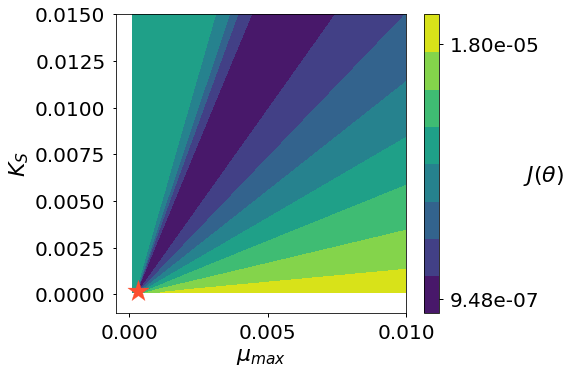

In [24]:
general_functions.plot_contour_monod(optimizer,optimal_params)